# <center><font color=blue>K-means Clustering </font>

<font size=4>Using the data provided in the file “Data.txt” with K = 3, apply K-means algorithm. Each row in the file corresponds to one data point. <br>
One important aspect of K-means that changes the results significantly is the initialization.
So you should run the K-means algorithm with the given initialization below above 100 times. The final output of the K-means clustering is the result that gives the minimum average distance between the points and the centers of their corresponding clusters.<br>
One possible startegy for intialization cluster centers  is to select the furthest points from each other.
</font>


In [1]:
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy
import numpy.ma as ma

In [2]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [3]:
def Random_Select(data):
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    m1 = np.random.randn(2,)*std + mean
    distances = np.zeros(300,)
    for i in range(len(data)):
        distances[i] = dist (data[i],m1,ax=None)
    m2= data[np.argmax(distances)]
    m2_index = np.argmax(distances)
    z = ma.masked_equal(distances,distances[m2_index])
    m3 =data[np.argmax(z)]
    return m1,m2,m3

In [4]:
def Membership(data,m1,m2,m3,rnk):
    """
    This function should implement step 2 in slide 6, Lec 6
    Possible values for rnk will be 0 or one ore Two
    Input: Dataset, 3-means, and memership vector
    Return: New membership vector
    """
    rnk = np.zeros(len(data))
    centers = np.vstack((m1,m2,m3))
    for i in range(len(data)):
        distances = dist(data[i], centers)
        cluster = np.argmin(distances)
        rnk[i] = cluster
    
    
    return rnk


In [5]:
def Update_Means(data,rnk):
    """
    This function should implement step 3 in slide 6, Lec 6
    
    Input: Dataset and memership vector
    Return: updated 3-means
    """
    m1 = np.mean(data[rnk == 0], axis=0)
    m2 = np.mean(data[rnk == 1], axis=0) 
    m3 = np.mean(data[rnk == 2], axis=0)  
  
    return m1,m2,m3


In [6]:
def Objective_Function(data,rnk,m1,m2,m3):
    
    d1 = dist (data[rnk==0],m1,ax=None) 
    d2 = dist (data[rnk==1],m2,ax=None) 
    d3 = dist (data[rnk==2],m3,ax=None)
    Avgdist = (1/3) * (d1+d2+d3)
    
    return Avgdist

In [7]:
def Stopping_Criteria(m1_b,m2_b,m3_b,m1,m2,m3):
    """
    This function should Test Convergence
    
    Input:  3-means before updating and after it.
    Return: return True or  return False
    """
    centers_old=np.vstack((m1_b,m2_b,m3_b))
    centers_new=np.vstack((m1,m2,m3))
    error=dist(centers_new,centers_old,None)
    if error != 0:
        return True
    else:
        return False

In [8]:
data=np.loadtxt("Data.txt") # Load Data
    
counter=0
k=3
#center = deepcopy(centers)
m1f,m2f,m3f=np.zeros((2,100)),np.zeros((2,100)),np.zeros((2,100)) # 3 - Means 

Avgdist=np.zeros((100,))

while(counter <100):
        # --------------------Intialization Step 1------------------------------#
        m1,m2,m3= Random_Select(data)
        
        rnk=np.zeros(len(data)) # Membership Vector
        
        m1_b=m1
        m2_b=m2
        m3_b=m3
        while(True):
            #---------------Step 2 compute rnk-----------------------------------------#
            
            rnk=Membership(data,m1,m2,m3,rnk)
            #---------------Step 3 update means-----------------------------------------#
            
            m1,m2,m3=Update_Means(data,rnk)
            #---------------Step 4 Test Convergence -----------------------------------------#
                
            if Stopping_Criteria(m1_b,m2_b,m3_b,m1,m2,m3):
                m1f[:,counter],m2f[:,counter],m3f[:,counter]=m1,m2,m3
                #print('yes')
                Avgdist[counter]=Objective_Function(data,rnk,m1,m2,m3)
                break
                
              
            m1_b=m1
            m2_b=m2
            m3_b=m3

        counter+=1     

        


  
    

In [222]:
np.argmin(Avgdist)



16

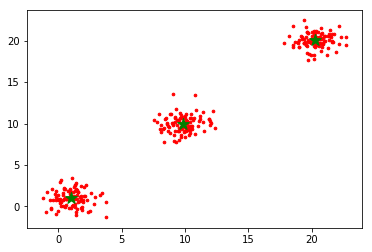

In [224]:
#m1f[2,6],m2f[2,6],m3f[2,6]
C = np.vstack((m1f[:,16],m2f[:,16],m3f[:,16]))
colors=['orange', 'blue', 'green']

for i in range(n):
    plt.scatter(data[i,0], data[i,1], s=7, c='r')
plt.scatter(C[:,0], C[:,1], marker='*', c='g', s=150)
plt.savefig('kmeans.png')